In [3]:
import re

import seaborn as sns
import tensorboard as tb
from matplotlib import pyplot as plt

In [59]:
experiment_id = "bji2DU6ySD2AWMiGbnY3dg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df.tag.unique()

array(['ETAinMins', 'EncoderUpdates/Avg', 'LossEncoder/Avg',
       'LossEncoder/Std', 'StepsPerSecond', 'TestAccuracy/E0',
       'TestAccuracy/E1', 'TestAccuracy/E2', 'TestAccuracy/E3',
       'TestAccuracy/E4', 'TestAccuracy/E5', 'TestAccuracy/E6',
       'TestAccuracy/E7', 'TrainAccuracy/E0', 'TrainAccuracy/E1',
       'TrainAccuracy/E2', 'TrainAccuracy/E3', 'TrainAccuracy/E4',
       'TrainAccuracy/E5', 'TrainAccuracy/E6', 'TrainAccuracy/E7',
       'TunedC/E0', 'TunedC/E1', 'TunedC/E2', 'TunedC/E3', 'TunedC/E4',
       'TunedC/E5', 'TunedC/E6', 'TunedC/E7'], dtype=object)

In [60]:
df.run.unique()

array(['T01-42-22:+encoder.model.architecture=SCN,+encoder.training.bb_size_multiplier=3,+experiment=10k_steps_in_lookatobjs,+platform=slurm,encoder.training.num_updates=8,encoder.training.preproc_ratio=1.0/s42/tb',
       'T01-42-22:+encoder.model.architecture=SCN,+encoder.training.bb_size_multiplier=3,+experiment=10k_steps_in_lookatobjs,+platform=slurm,encoder.training.num_updates=8,encoder.training.preproc_ratio=1.0/s42/tb/postproc',
       'T14-38-46:+encoder.model.architecture=DRN9,+encoder.training.bb_size_multiplier=2,+experiment=10k_steps_in_lookatobjs,+platform=slurm,encoder.training.num_updates=1,encoder.training.preproc_ratio=1.0/s42/tb',
       'T14-38-46:+encoder.model.architecture=DRN9,+encoder.training.bb_size_multiplier=2,+experiment=10k_steps_in_lookatobjs,+platform=slurm,encoder.training.num_updates=1,encoder.training.preproc_ratio=1.0/s42/tb/postproc',
       'T14-38-46:+encoder.model.architecture=DRN9,+encoder.training.bb_size_multiplier=3,+experiment=10k_steps_in_l

In [45]:
# Finds 6 param groups (they are always in the same order e.g. network arch is the first group)
regex = r"T\d{2}-\d{2}-\d{2}:\+?([\w\.]+=[\w\.]+),\+?([\w\.]+=[\w\.]+),\+?([\w\.]+=[\w\.]+),\+?([\w\.]+=[\w\.]+),\+?([\w\.]+=[\w\.]+),\+?([\w\.]+=[\w\.]+)"

encoder_model_arch = df.run.apply(lambda run: re.search(regex, run).group(1).split("=")[1])
encoder_model_arch.name = "Encoder arch."

bb_size_multiplier = df.run.apply(lambda run: re.search(regex, run).group(2).split("=")[1])
bb_size_multiplier.name = "Buffer/Batch size mul."

num_updates = df.run.apply(lambda run: re.search(regex, run).group(5).split("=")[1])
num_updates.name = "Num. updates"

In [55]:
def plot_loss_n_train_test_accuracy(df, hue):
    fig = plt.figure(figsize=(16, 12))

    ax = fig.add_subplot(221)
    sns.lineplot(data=df[df.tag.str.startswith("LossEncoder/Avg")], x="step", y="value", hue=hue, ax=ax)
    ax.set_title('Loss encoder (Avg)')
    ax.grid()
    
    ax = fig.add_subplot(222)
    sns.lineplot(data=df[df.tag.str.startswith("LossEncoder/Std")], x="step", y="value", hue=hue, ax=ax)
    ax.set_title('Loss encoder (Std)')
    ax.grid()
    
    ax = fig.add_subplot(223)
    sns.lineplot(data=df[df.tag.str.startswith("TrainAccuracy")], x="step", y="value", hue=hue, ax=ax)
    ax.set_title('Train accuracy')
    ax.set_ylim(0.2, 0.6)
    ax.grid()

    ax = fig.add_subplot(224)
    sns.lineplot(data=df[df.tag.str.startswith("TestAccuracy")], x="step", y="value", hue=hue, ax=ax)
    ax.set_title('Test accuracy')
    ax.set_ylim(0.2, 0.6)
    ax.grid()

# Encoder model architecture

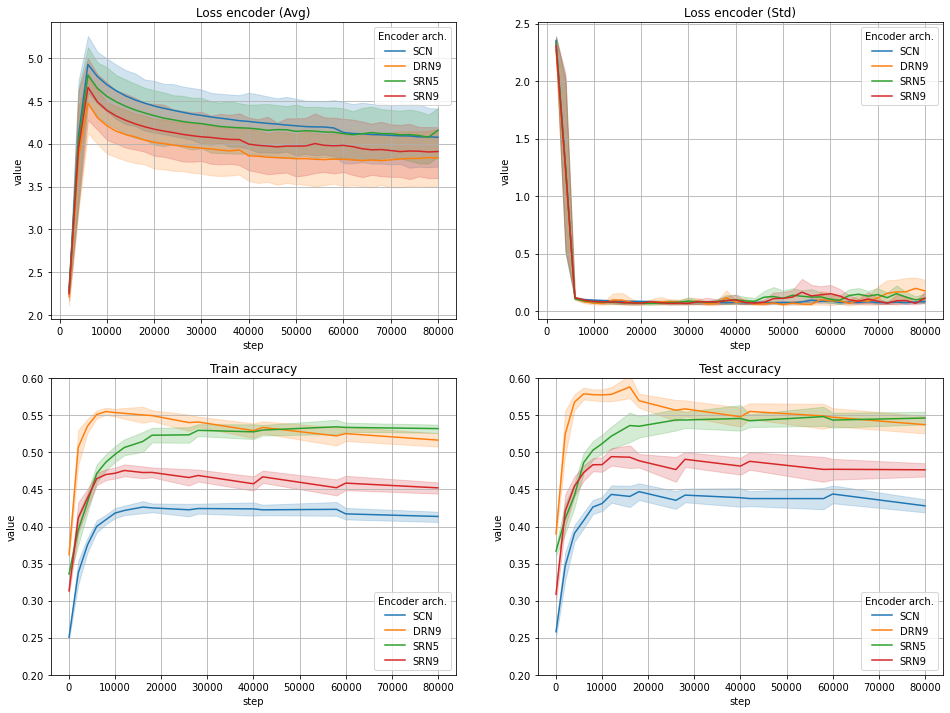

In [56]:
plot_loss_n_train_test_accuracy(df=df, hue=encoder_model_arch)

# Buffer/Batch size multiplier

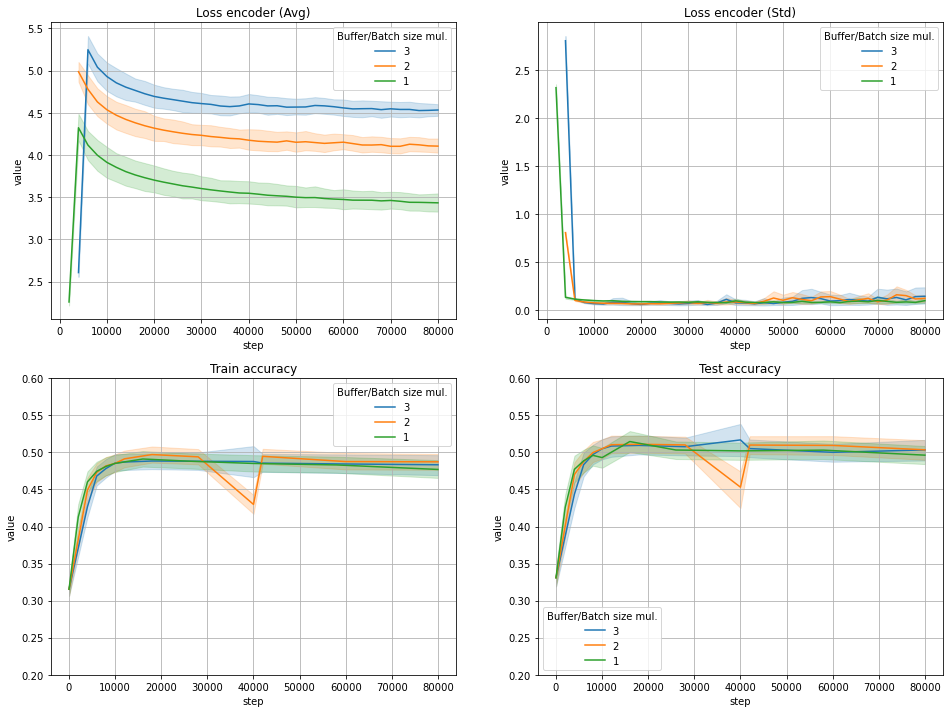

In [65]:
plot_loss_n_train_test_accuracy(df=df, hue=bb_size_multiplier)

## SRN5 only

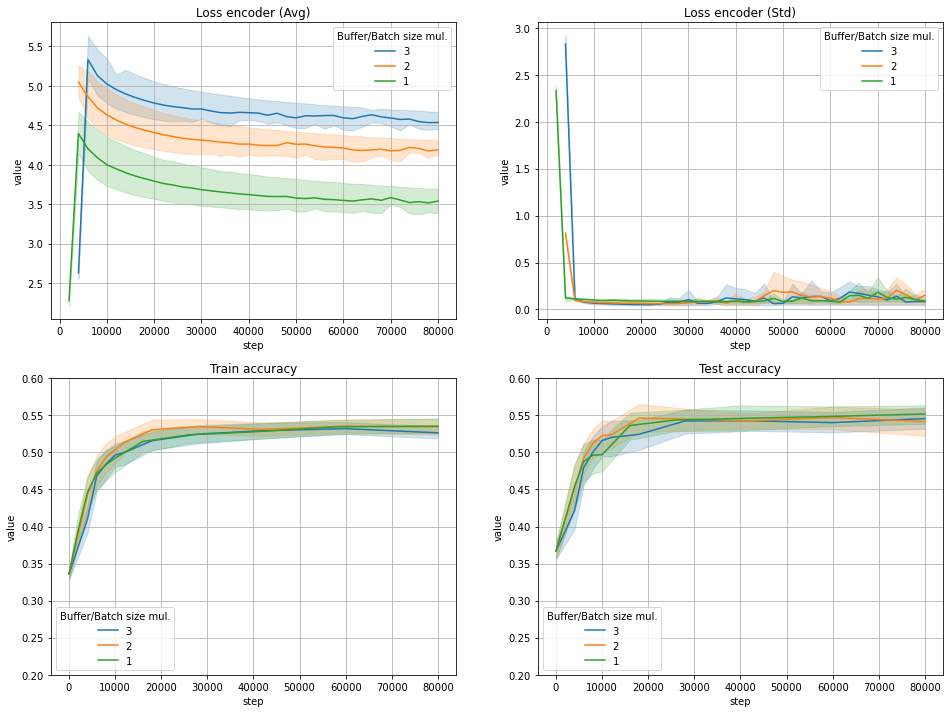

In [66]:
plot_loss_n_train_test_accuracy(df=df[df.run.str.contains("SRN5")], hue=bb_size_multiplier)

# Num. updates

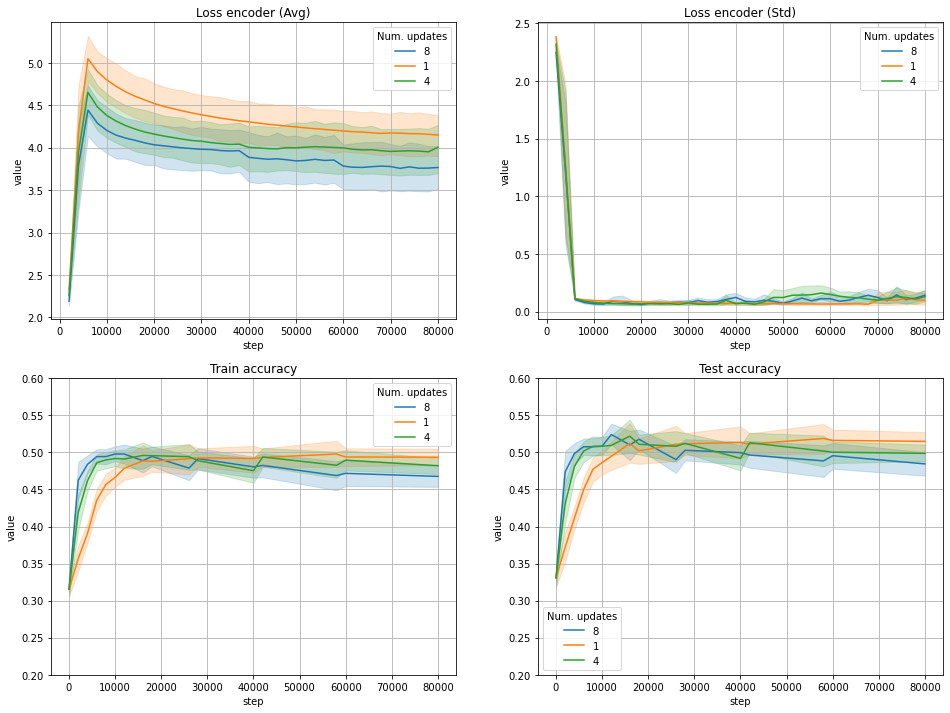

In [67]:
plot_loss_n_train_test_accuracy(df=df, hue=num_updates)

## SRN5 only

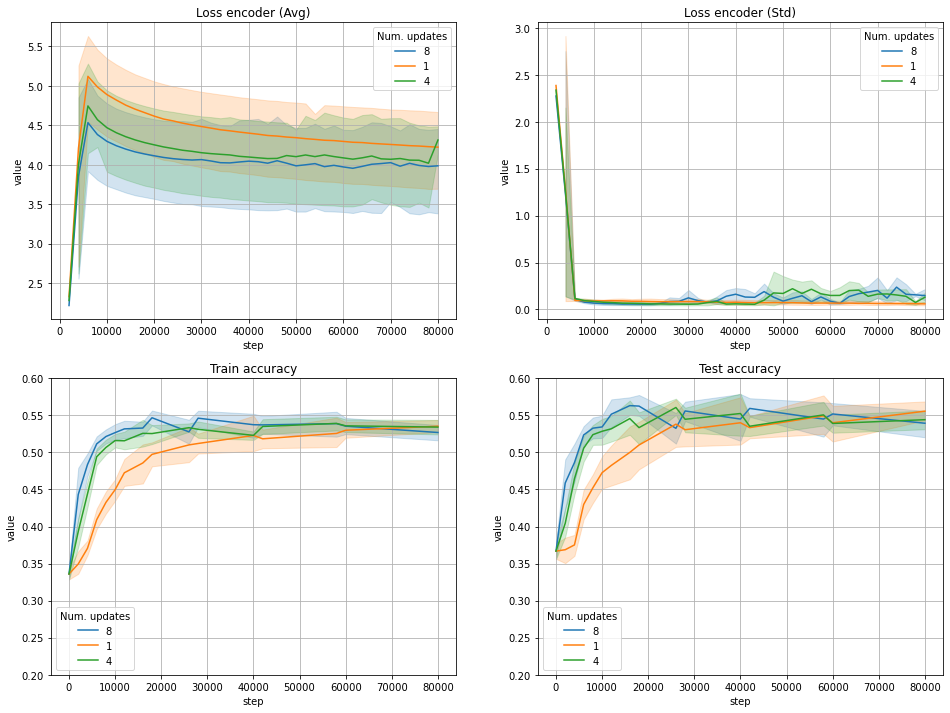

In [68]:
plot_loss_n_train_test_accuracy(df=df[df.run.str.contains("SRN5")], hue=num_updates)